In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np

In [3]:
with open('transaction_history_1000.json') as json_file:
    data = json.load(json_file)

In [4]:
len(data)

2

In [6]:
len(data['transactions'])

1000

In [11]:
k = {'a':[1,2,3],'b':[4,5,6],'c':[7,8,9]}

In [12]:
df = pd.DataFrame(k)

In [13]:
df.head()

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [14]:
blockdf = pd.DataFrame(data['transactions'])

In [15]:
blockdf.head()

,transaction_hash,tx_index,bundle_index,block_number,eao_address,to_address,gas_used,gas_price,coinbase_transfer,total_miner_reward
0,0xa0ce6d68c294fc6b4832f243be59142c537ffdd6863f...,0,1,15492643,0x0D78FCF0a3E51124b2531A80950023f5Ba2E8FAc,0xFA103c21ea2DF71DFb92B0652F8B1D795e51cdEf,189742,1464105325,0,277802272576150
1,0x9a2d2ca9e6c3c249de58c04ff674a4c540754300db55...,1,0,15492643,0x79b7a69d90c82E014Bf0315e164208119B510FA0,0xE06fFA8146bBdECcBaaF72B6043b29091071AEB8,133347,111562823872,0,14876567874859584
2,0xfb9812328d8ade6f7348e31421f2d639d095d895a3a2...,0,0,15492643,0x49c6fB6CBe27Ce0E773B85840Cb072791368e5Bb,0xd9e1cE17f2641f24aE83637ab66a2cca9C378B9F,101466,2000000000,0,202932000000000
3,0xc0c6819d6ff8cf70ba124ddc23e3fb43bd1a550a1571...,0,4,15492641,0x49c3FeaFDdaefC3Bed06F4ff87CE86610C2c1076,0x03f7724180AA6b939894B5Ca4314783B0b36b329,109034,2000000000,0,218068000000000
4,0x02fcf5944c6859b6da4ff23117311c8164632fddba99...,0,3,15492641,0x1fd34033240C95aaBf73E186A94B9576C6DAB81B,0xA1006d0051a35b0000F961a8000000009eA8d2dB,288099,2363593429,0,680948903301471


In [16]:
blockdf.drop(columns = ['transaction_hash'], inplace = True)

In [17]:
blockdf.head()

,tx_index,bundle_index,block_number,eao_address,to_address,gas_used,gas_price,coinbase_transfer,total_miner_reward
0,0,1,15492643,0x0D78FCF0a3E51124b2531A80950023f5Ba2E8FAc,0xFA103c21ea2DF71DFb92B0652F8B1D795e51cdEf,189742,1464105325,0,277802272576150
1,1,0,15492643,0x79b7a69d90c82E014Bf0315e164208119B510FA0,0xE06fFA8146bBdECcBaaF72B6043b29091071AEB8,133347,111562823872,0,14876567874859584
2,0,0,15492643,0x49c6fB6CBe27Ce0E773B85840Cb072791368e5Bb,0xd9e1cE17f2641f24aE83637ab66a2cca9C378B9F,101466,2000000000,0,202932000000000
3,0,4,15492641,0x49c3FeaFDdaefC3Bed06F4ff87CE86610C2c1076,0x03f7724180AA6b939894B5Ca4314783B0b36b329,109034,2000000000,0,218068000000000
4,0,3,15492641,0x1fd34033240C95aaBf73E186A94B9576C6DAB81B,0xA1006d0051a35b0000F961a8000000009eA8d2dB,288099,2363593429,0,680948903301471


In [19]:
blockdf.to_csv('block_data_raw.csv')

In [26]:
blockdf[['total_miner_reward']].describe()

,total_miner_reward
count,1000
unique,629
top,0
freq,361


In [29]:
blockdf = blockdf.astype({"total_miner_reward": float, "gas_used": float, "gas_price": float,
               "coinbase_transfer": float})

<AxesSubplot:xlabel='total_miner_reward'>

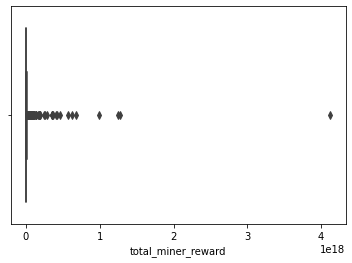

In [30]:
sns.boxplot(x = blockdf['total_miner_reward'])

In [31]:
blockdf['total_miner_reward'].describe()

count    1.000000e+03
mean     2.028204e+16
std      1.541747e+17
min      0.000000e+00
25%      0.000000e+00
50%      4.326964e+14
75%      3.397000e+15
max      4.123736e+18
Name: total_miner_reward, dtype: float64

In [ ]:
{1 : [0, 4.32*(10**14)],
2: []}

In [33]:
4.32*(10**14)

432000000000000.0

In [35]:
blockdf['total_miner_reward'][2]

202932000000000.0

In [41]:
blockdf['MEV_LEVEL'] = blockdf['total_miner_reward']

blockdf['MEV_LEVEL'] = blockdf['MEV_LEVEL'].apply(lambda x: 1 if x <= 4.32*(10**14) else x )
blockdf['MEV_LEVEL'] = blockdf['MEV_LEVEL'].apply(lambda x: 2 if x <= 3.39*(10**15) and x > 4.32*(10**14) else x )
blockdf['MEV_LEVEL'] = blockdf['MEV_LEVEL'].apply(lambda x: 3 if x > 3.39*(10**15) else x )

# for i in range(len(blockdf)):
#     if 0 <= blockdf['total_miner_reward'][i] <= 4.32*(10**14):
#          blockdf.at[i, 'MEV_LEVEL'] = 1
#     elif 4.32*(10**14) < blockdf['total_miner_reward'][i] <= 3.39*(10**15):
#         blockdf.at[i, 'MEV_LEVEL'] = 2
#     elif blockdf['total_miner_reward'][i] > 3.39*(10**15):
#         blockdf.at[i, 'MEV_LEVEL'] = 3

<AxesSubplot:xlabel='MEV_LEVEL', ylabel='total_miner_reward'>

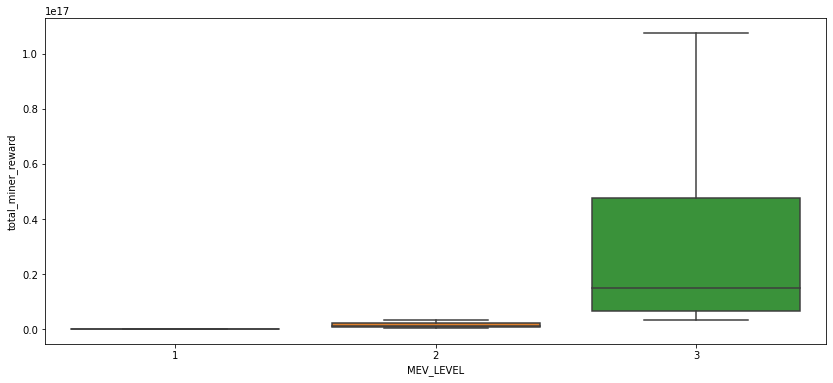

In [42]:
plt.figure(figsize=(14,6))
sns.boxplot(x = blockdf['MEV_LEVEL'], y = blockdf['total_miner_reward'], showfliers = False)

In [43]:
blockdf.to_csv('block_df_processed.csv')

In [44]:
blockdf.head()

,tx_index,bundle_index,block_number,eao_address,to_address,gas_used,gas_price,coinbase_transfer,total_miner_reward,MEV_LEVEL
0,0,1,15492643,0x0D78FCF0a3E51124b2531A80950023f5Ba2E8FAc,0xFA103c21ea2DF71DFb92B0652F8B1D795e51cdEf,189742.0,1.464105e+09,0.0,2.778023e+14,1
1,1,0,15492643,0x79b7a69d90c82E014Bf0315e164208119B510FA0,0xE06fFA8146bBdECcBaaF72B6043b29091071AEB8,133347.0,1.115628e+11,0.0,1.487657e+16,3
2,0,0,15492643,0x49c6fB6CBe27Ce0E773B85840Cb072791368e5Bb,0xd9e1cE17f2641f24aE83637ab66a2cca9C378B9F,101466.0,2.000000e+09,0.0,2.029320e+14,1
3,0,4,15492641,0x49c3FeaFDdaefC3Bed06F4ff87CE86610C2c1076,0x03f7724180AA6b939894B5Ca4314783B0b36b329,109034.0,2.000000e+09,0.0,2.180680e+14,1
4,0,3,15492641,0x1fd34033240C95aaBf73E186A94B9576C6DAB81B,0xA1006d0051a35b0000F961a8000000009eA8d2dB,288099.0,2.363593e+09,0.0,6.809489e+14,2


In [5]:
with open('latest_blocks.json') as json_file:
    data_full = json.load(json_file)

MemoryError: 